In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import sys
import warnings
import joblib

warnings.filterwarnings("ignore")
sys.path.insert(0,'..')

from BMR.ml_models import *

random.seed(0)
np.random.seed(0)

In [2]:
max_x = max_y = 6.0

def fun_Himmelblau(x):
    y = (x[:, 0]**2 + x[:, 1] - 11)**2 + (x[:, 0] + x[:, 1]**2 - 7)**2
    return y.reshape(-1,1)

max_val = np.max(fun_Himmelblau(np.array([[max_x, max_x], [max_x, -max_x], [-max_x, max_x], [-max_x, -max_x]])))
def generate_Himmelblau(n=100, sigma=0):
    x = (ss.uniform.rvs(size=(n, 2))-0.5)*max_x*2
    y = fun_Himmelblau(x)
    y = y/max_val
    if sigma>0:
        norm = ss.norm(loc=0, scale=sigma)
        y += norm.rvs(size=(n, 1))
    return x, y

def make_plot(sample_x, sample_y, params, filename):
    plt.rcParams["figure.figsize"] = (8,5)
    n=params['n']
    sigma=params['sigma']
    plt.scatter(sample_x[:, 0], sample_x[:, 1], c=sample_y)
    plt.title(f'n={n} sigma={sigma}')
    plt.colorbar()
    plt.savefig(f'{filename}_n{n}_sigma{sigma}.pdf')
    plt.show()

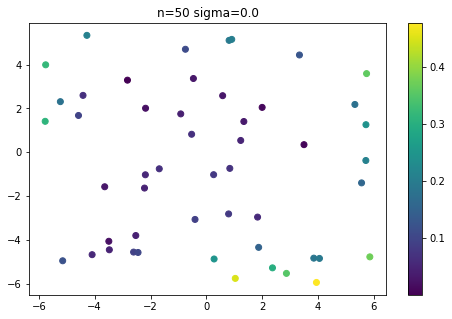

*** Method=catboost loop=0
*** Method=catboost loop=1


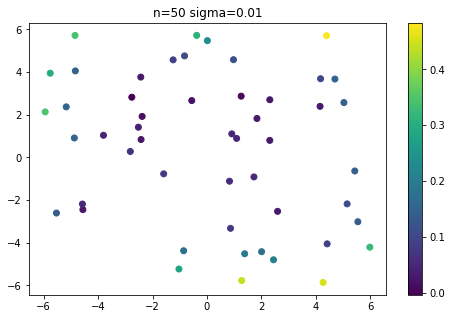

*** Method=catboost loop=0
*** Method=catboost loop=1


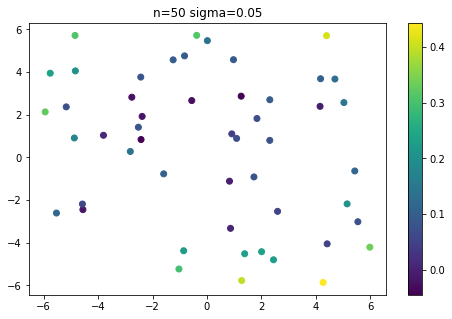

*** Method=catboost loop=0
*** Method=catboost loop=1


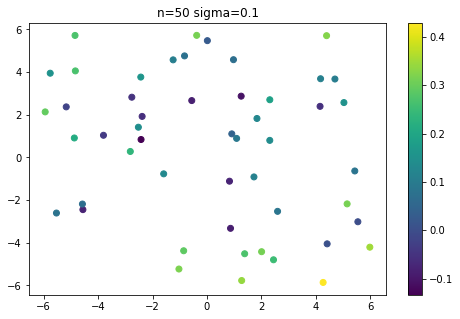

*** Method=catboost loop=0
*** Method=catboost loop=1


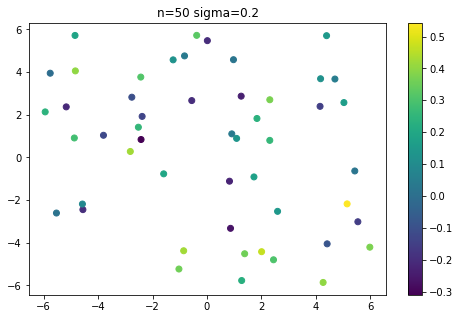

*** Method=catboost loop=0
*** Method=catboost loop=1


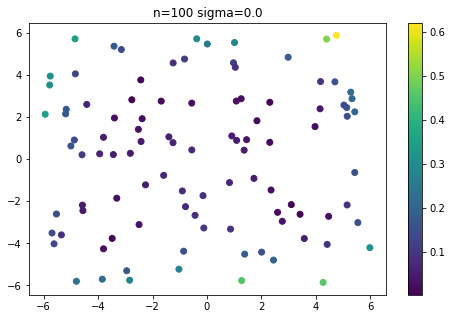

*** Method=catboost loop=0
*** Method=catboost loop=1


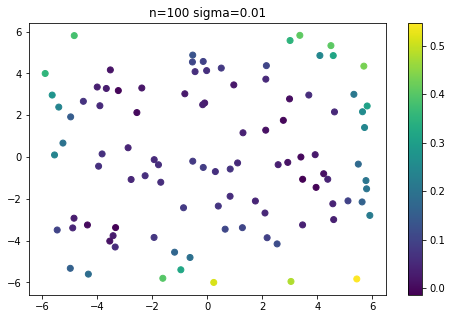

*** Method=catboost loop=0
*** Method=catboost loop=1


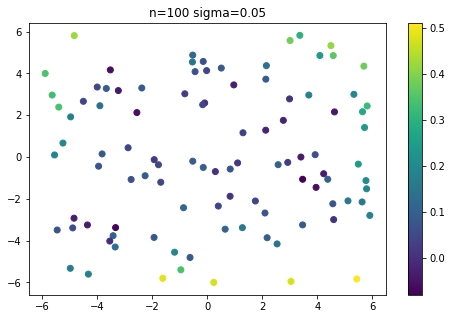

*** Method=catboost loop=0
*** Method=catboost loop=1


KeyboardInterrupt: 

In [3]:
ns = [50, 100, 500, 1000]
sigmas = [0.0, 0.01, 0.05, 0.1, 0.2]
for n in ns:
    for sigma in sigmas:
        X, y = generate_Himmelblau(n=n, sigma=sigma)
        make_plot(sample_x=X, sample_y=y, params={'n': n, 'sigma': sigma}, filename='Himmelblau')
        run_all(X, y, f'Himmelblau_n{n}_sigma{sigma}.joblib', mcloops=10)